<a href="https://colab.research.google.com/github/batuhanyndny/notebooks/blob/master/roc_curve_and_conf_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd # dataframes
from sklearn.svm import SVC # svm
#preprocessing
from sklearn.model_selection import train_test_split 
# metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
# visualization
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("haberman.csv")
Y = df.pop("SURVIVAL")
X = df

In [ ]:
# replace 2's with 0's for better binary classification
Y = Y.replace(2,0)

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    0
305    0
Name: SURVIVAL, Length: 306, dtype: int64


In [ ]:
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (306, 3)
Y shape:  (306,)


In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (244, 3)
y_train shape:  (244,)
X_test shape:  (62, 3)
y_test shape:  (62,)


In [ ]:
# SVM
clf = SVC(C=1.1, tol=1e-4,)
clf.fit(X_train, y_train)

SVC(C=1.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)

In [ ]:
# predict
y_pred = clf.predict(X_test)
# convert series to np.ndarray
y_test = y_test.to_numpy()

In [ ]:
print("Prediction: ",y_pred)
print("True: ", y_test)

Prediction:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
True:  [1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1]


In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 0 18]
 [ 1 43]]


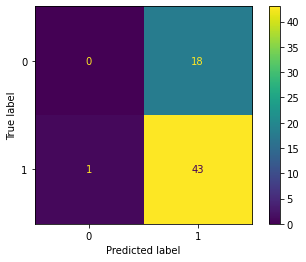

In [ ]:
# confusion matrix plot
plot_confusion_matrix(clf, X_test, y_test) 
plt.show()

In [ ]:
# Function for calculation sens, spec
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

TP, FP, TN, FN = perf_measure(y_test, y_pred)
print("Overall")
# Sensitivity = (True Positive)/(True Positive + False Negative)
print("sensitivity: ", TP / (TP + FN))
# Specificity = (True Negative)/(True Negative + False Positive)
print("specificity: ", TN/(TN+FP))
print("accuracy: ", accuracy_score(y_test, y_pred))

Overall
sensitivity:  0.9772727272727273
specificity:  0.0
accuracy:  0.6935483870967742


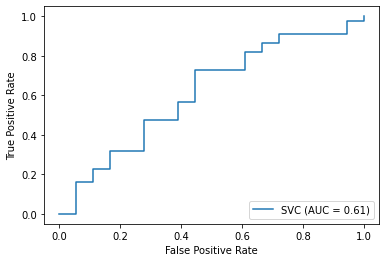

In [ ]:
# ROC curve
plot_roc_curve(clf, X_test, y_test)
plt.show()